<a href="https://colab.research.google.com/github/peteray-dev/AML_Car_Price_Prediction/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download orogunadebola/credit-card-transaction-dataset-fraud-detection


Dataset URL: https://www.kaggle.com/datasets/orogunadebola/credit-card-transaction-dataset-fraud-detection
License(s): unknown
100% 1.48G/1.48G [01:04<00:00, 32.2MB/s]
100% 1.48G/1.48G [01:04<00:00, 24.6MB/s]


In [3]:
! mkdir fraud_detection
! unzip /content/credit-card-transaction-dataset-fraud-detection.zip -d fraud_detection

Archive:  /content/credit-card-transaction-dataset-fraud-detection.zip
  inflating: fraud_detection/data.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('/content/fraud_detection/data.csv')

In [6]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,customer_avg_amout_1_day,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day
0,024-79-2449,30417925130692,Felicia,Gomez,F,486 Benson Stravenue,Rockford,IL,61107,42.2786,...,4.01,18.27,6.97,4824.23,73065.81,141799.95,4,13,20,14
1,269-54-1394,4224979584238239,Jeffrey,Mathews,M,5430 Leslie Flat Suite 854,Ceres,CA,95307,37.5833,...,88.83,77.27,8.06,3243.55,51496.77,1093950.50,3,10,11,28
2,527-16-1817,4056555304074394,Christina,Ellis,F,75933 Harvey Via Apt. 423,Buffalo,NY,14224,42.8371,...,66.96,67.47,43.41,4242.22,26384.49,1005859.33,6,14,23,48
3,314-98-4472,6011544296258081,Steven,Murphy,M,268 Anderson Valley Apt. 958,Mansfield Center,CT,6250,41.7698,...,15.32,58.22,52.05,4303.16,3476.36,226662.34,3,11,14,14
4,390-83-9961,374917808855764,Cynthia,Martinez,F,53164 Deborah Square Apt. 739,Anaheim,CA,92804,33.8186,...,28.81,44.64,24.65,2424.13,32215.14,36989.60,2,13,16,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580255 entries, 0 to 8580254
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ssn                         object 
 1   cc_num                      int64  
 2   first                       object 
 3   last                        object 
 4   gender                      object 
 5   street                      object 
 6   city                        object 
 7   state                       object 
 8   zip                         int64  
 9   lat                         float64
 10  long                        float64
 11  city_pop                    int64  
 12  job                         object 
 13  dob                         object 
 14  acct_num                    int64  
 15  profile                     object 
 16  trans_num                   object 
 17  trans_date                  object 
 18  trans_time                  object 
 19  unix_time            

In [8]:
df.head(1).transpose()

,0
ssn,024-79-2449
cc_num,30417925130692
first,Felicia
last,Gomez
gender,F
street,486 Benson Stravenue
city,Rockford
state,IL
zip,61107
lat,42.2786


In [9]:
df.isnull().sum()

,0
ssn,0
cc_num,0
first,0
last,0
gender,0
street,0
city,0
state,0
zip,0
lat,0


In [10]:
for i in df.columns:
  print(i, df[i].nunique())

ssn 9968
cc_num 9968
first 663
last 986
gender 2
street 9968
city 3694
state 51
zip 6822
lat 6676
long 6743
city_pop 4356
job 639
dob 8188
acct_num 9968
profile 12
trans_num 8580255
trans_date 366
trans_time 86400
unix_time 6699491
category 14
amt 119685
is_fraud 2
merchant 693
merch_lat 6756782
merch_long 7695067
customer_num_trans_1_day 7
customer_num_trans_7_day 12
customer_num_trans_30_day 17
trans_time_secs 86399
trans_time_hrs 24
trans_time_is_night 2
trans_time_day 7
trans_date_is_weekend 2
customer_avg_amout_1_day 8901
customer_avg_amount_7_day 8901
customer_avg_amount_30_day 6901
merchant_num_trans_1_day 490001
merchant_num_trans_7_day 5739184
merchant_num_trans_30_day 8250846
merchant_risk_1_day 8
merchant_risk_7_day 16
merchant_risk_30_day 24
merchant_risk_90_day 51


In [11]:
# Im dropping this because they arent useful for analysis based on domain knowledge,
# ~the trans hr and sencond will be dropped becasue the time are different fro the real transaction time this may be because of the time zones where the transacion happens
# and the timestamp of the server, instead i will use the unix time stamp for analysis
df.drop(columns=['first','profile','ssn', 'cc_num','acct_num', 'merch_lat', 'merch_long', 'zip', 'street','trans_time_secs', 'trans_time_hrs' ,'last'],  inplace=True)

In [12]:
df['dob'] = pd.to_datetime(df['dob'])
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [13]:
# get the age out of dob
import datetime

def calculate_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)

In [14]:
df.drop(columns='dob', inplace=True)

In [15]:
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

print(f"numerical columns: {num_col}")
print(f"categorical columns: {cat_col}")

numerical columns: Index(['lat', 'long', 'city_pop', 'unix_time', 'amt', 'is_fraud',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'trans_time_is_night', 'trans_time_day',
       'trans_date_is_weekend', 'customer_avg_amout_1_day',
       'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
       'merchant_num_trans_1_day', 'merchant_num_trans_7_day',
       'merchant_num_trans_30_day', 'merchant_risk_1_day',
       'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day',
       'age'],
      dtype='object')
categorical columns: Index(['gender', 'city', 'state', 'job', 'trans_num', 'trans_date',
       'trans_time', 'category', 'merchant'],
      dtype='object')


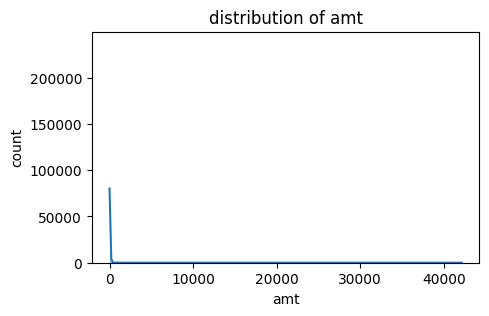

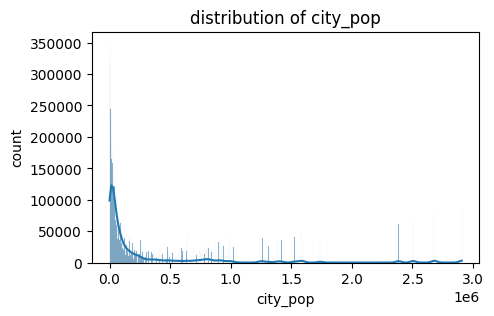

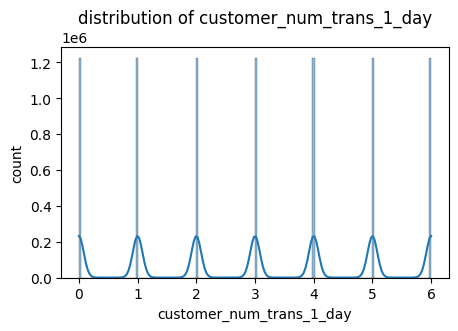

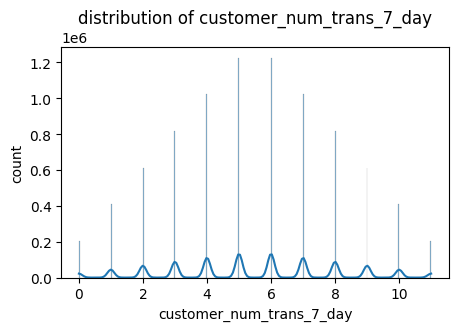

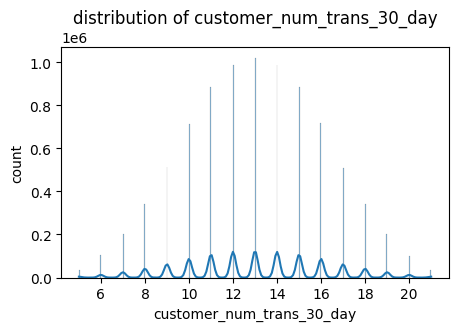

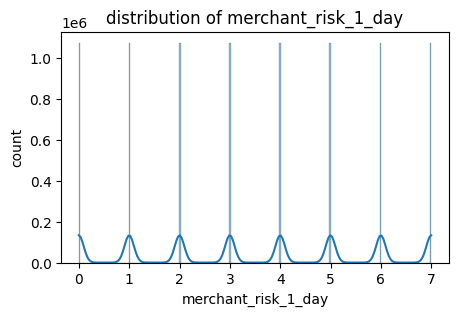

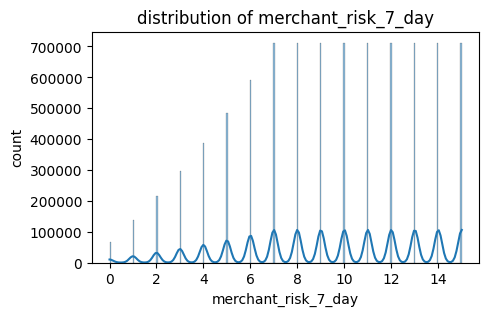

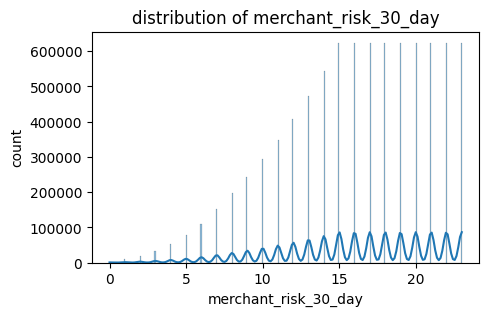

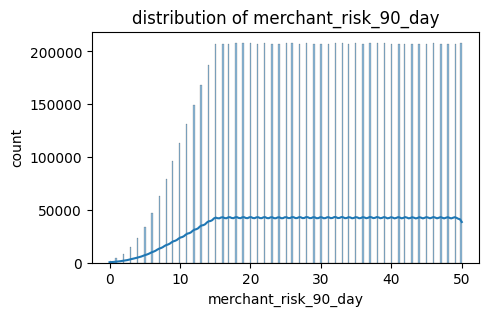

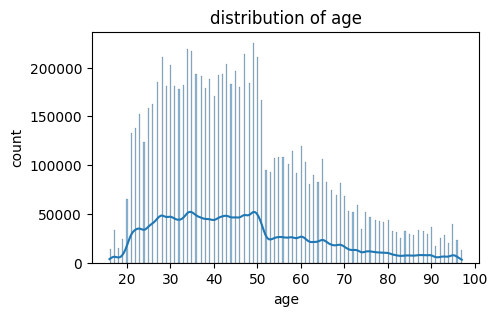

In [16]:
def plot_hist(df, num_col):
  for col in num_col:
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.histplot(data=df, x=col, ax=ax, kde=True)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
numb = ['amt', 'city_pop', 'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day',
       'merchant_risk_90_day', 'age']

plot_hist(df, numb)


In [17]:
np.number

numpy.number

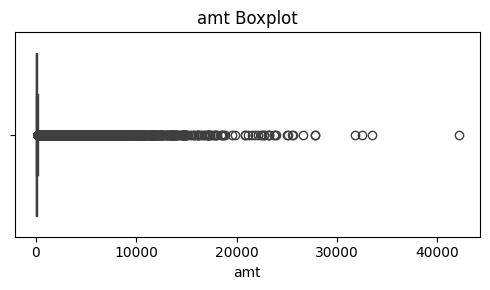

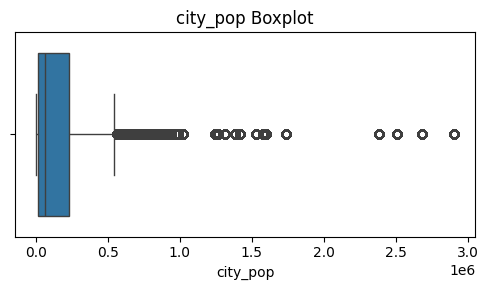

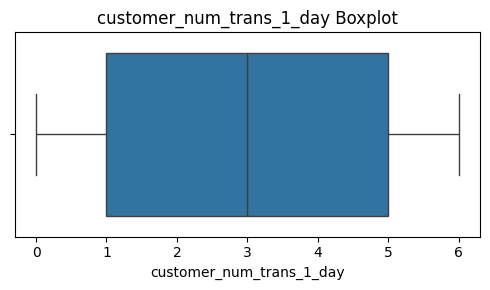

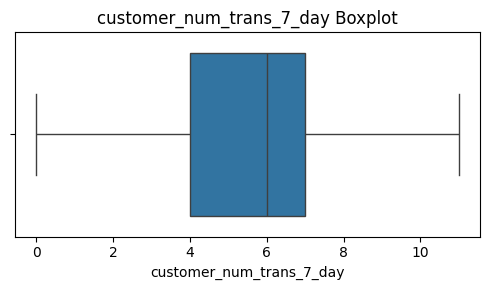

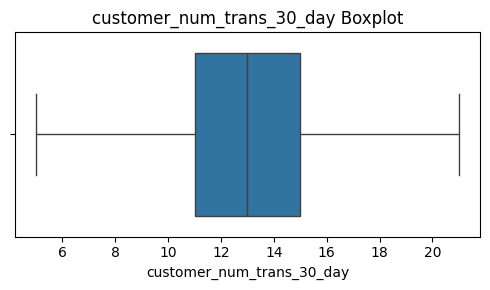

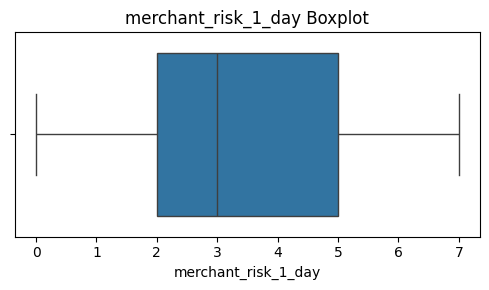

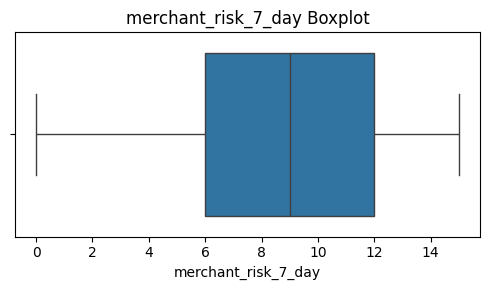

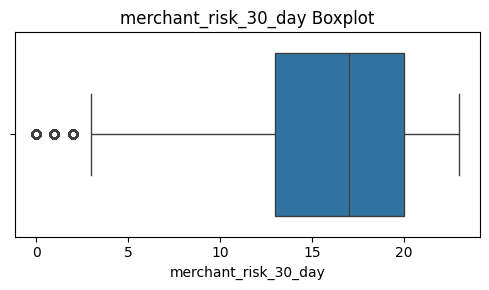

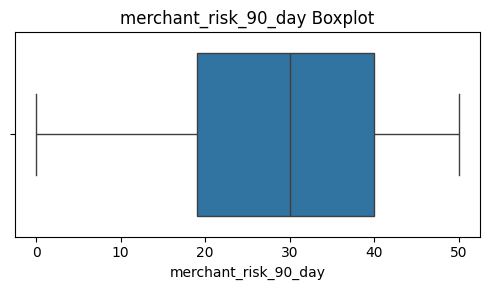

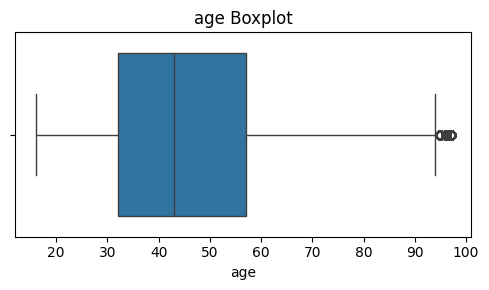

In [18]:


def univariate_analysis(df, cols):
    for col in cols:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.boxplot(x=df[col], ax=ax)  # Fixed axis input (x=col)
        plt.title(f'{col} Boxplot')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

# List of numeric columns to analyze
numb = ['amt', 'city_pop', 'customer_num_trans_1_day', 'customer_num_trans_7_day',
        'customer_num_trans_30_day', 'merchant_risk_1_day', 'merchant_risk_7_day',
        'merchant_risk_30_day', 'merchant_risk_90_day', 'age']

# Call the function
univariate_analysis(df, numb)


In [19]:
# i might not be removing outliers as seen in the amount, since this is afraud detection system
# fraudsters might want to access such huge amount of money

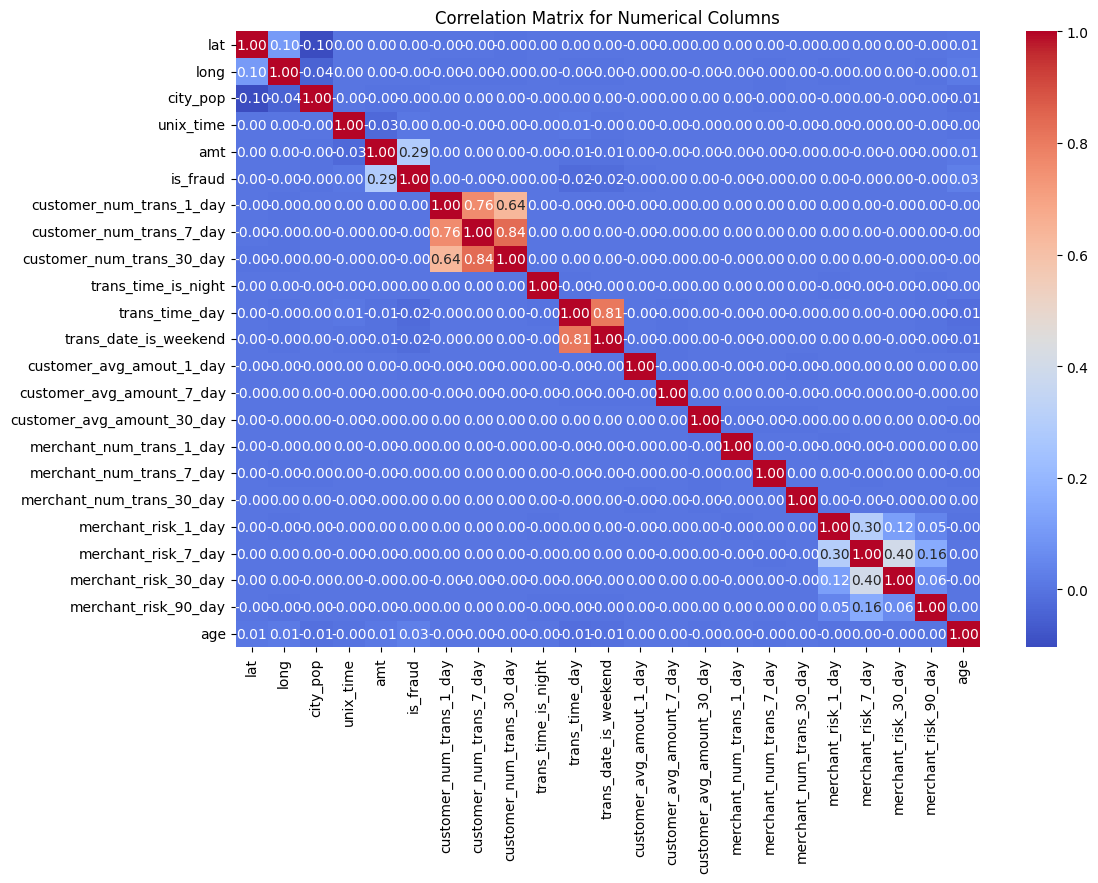

In [20]:
# Display correlation matrix for numerical columns
correlation_matrix = df[num_col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

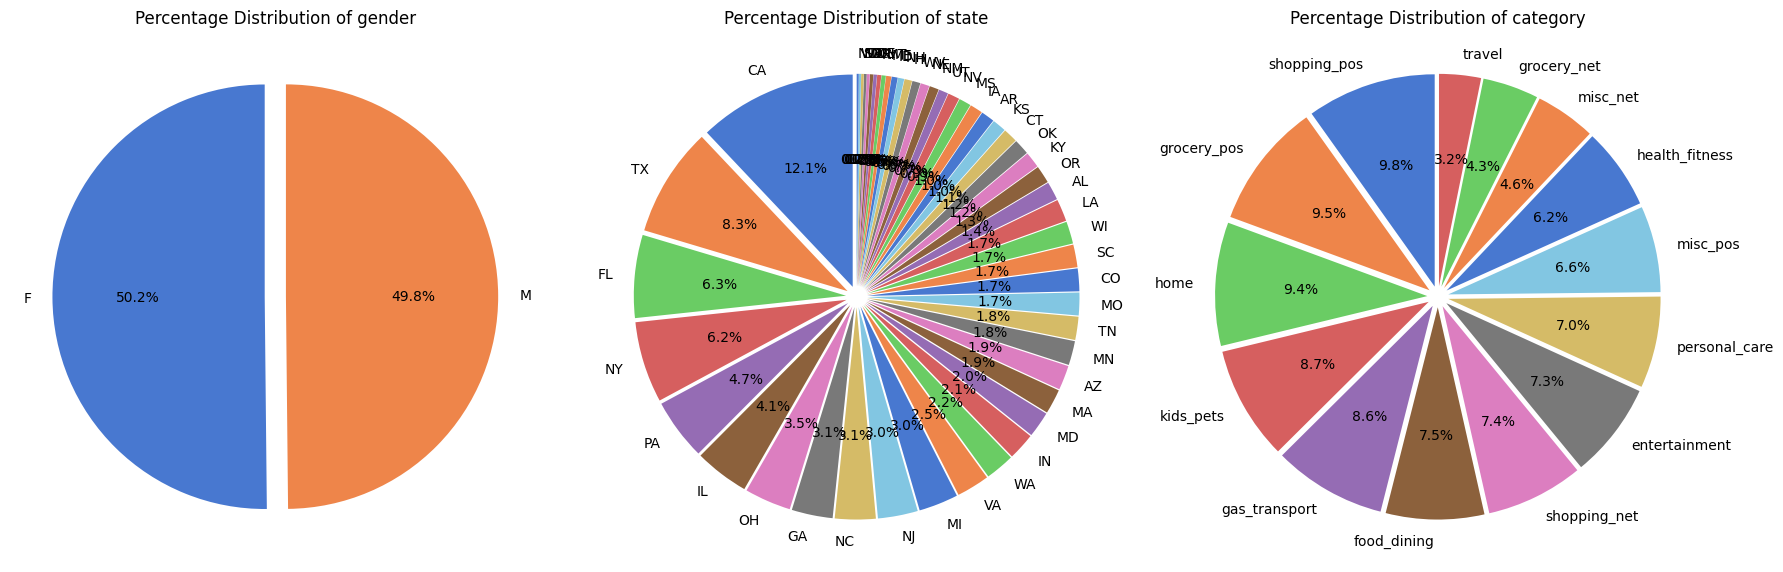

In [21]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                               startangle=90, explode=[0.05] * value_counts.nunique())

        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['gender','state','category']
plot_categorical_distributions(columns_to_plot)

In [22]:
df.groupby('merchant')['is_fraud'].value_counts().sort_index()


merchant                      is_fraud
fraud_Abbott-Rogahn           0           12317
                              1              54
fraud_Abbott-Steuber          0           11861
                              1              51
fraud_Abernathy and Sons      0           12900
                                          ...  
fraud_Ziemann-Waters          1              29
fraud_Zieme, Bode and Dooley  0           14449
                              1             138
fraud_Zulauf LLC              0           12090
                              1              44
Name: count, Length: 1386, dtype: int64

In [23]:
df.groupby('merchant')['is_fraud'].sum().sort_values(ascending=False)
# the top targetted merchant for fraud attacks

,is_fraud
merchant,
fraud_Gerlach Inc,515
fraud_Kilback LLC,511
fraud_Boyer PLC,504
fraud_Goyette Inc,494
fraud_Miller-Hauck,486
...,...
"fraud_Turcotte, Batz and Buckridge",21
"fraud_Larson, Quitzon and Spencer",21
"fraud_Rutherford, Homenick and Bergstrom",21


<Axes: xlabel='category'>

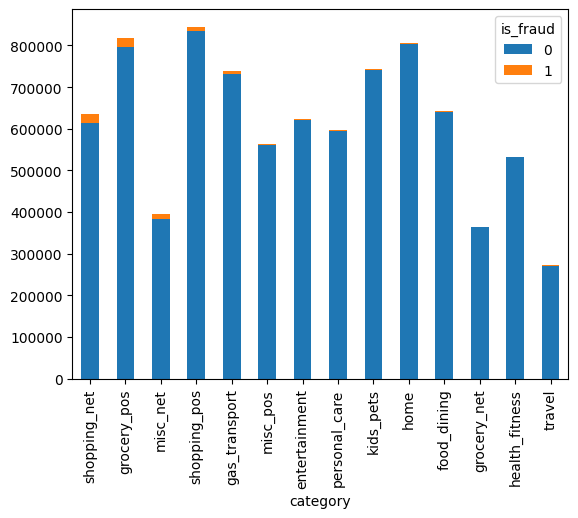

In [24]:
df.groupby('category')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).plot(kind='bar', stacked=True)
# understanding which category the fraud is coming more from

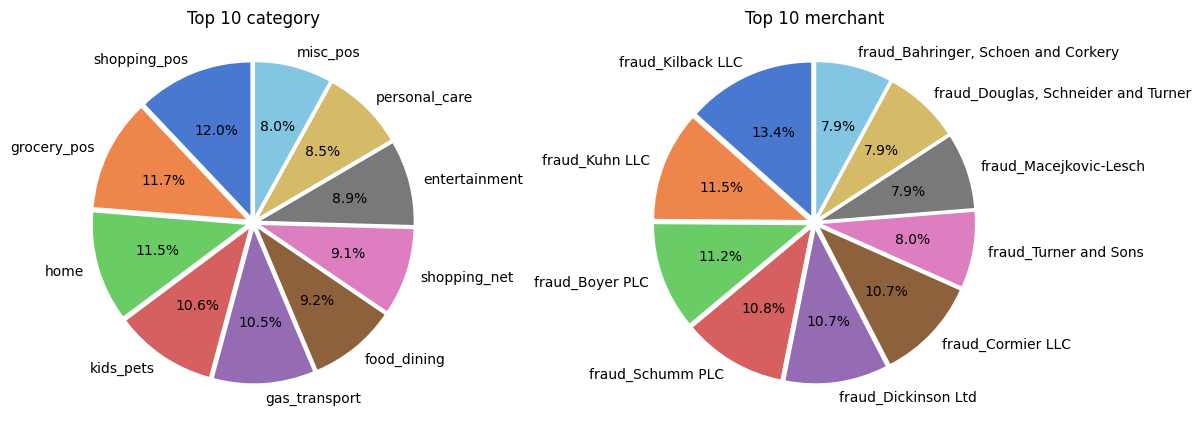

In [25]:
def plot_top_categories_pie_charts(columns, data=df, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)

        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(10)

        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                                 startangle=90, explode=[0.05] * len(top_categories))

        plt.title(f'Top 10 {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['category', 'merchant']
plot_top_categories_pie_charts(columns_to_plot)

Insight: from the top 10 merchant, the fraudster attach the 2 of the top merchant, fraud_kilback_LLC and fraud_boyer_PLC, showing the fraudster sometime atttak the top merchants more.

grocery_pos has more fraudulent attach and being that it is one of the most spots where transactions were made

<Axes: xlabel='city'>

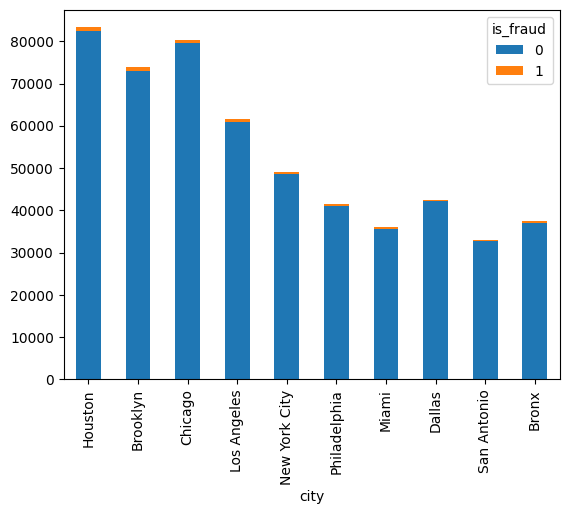

In [26]:
df.groupby('city')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True)

fraud cases comes more from Houston, brooklyn and chicago, cities likeNavoo, essex junction has no cases

<Axes: xlabel='state'>

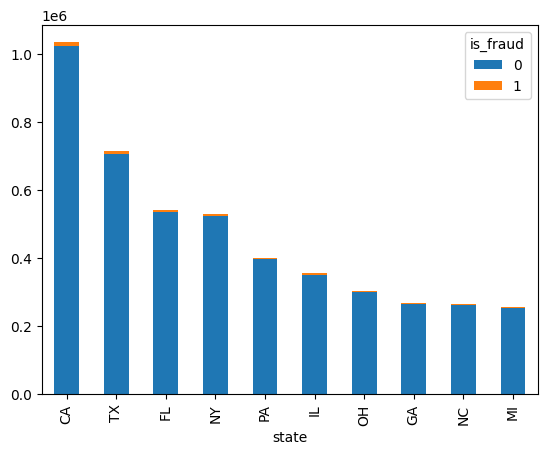

In [27]:
df.groupby('state')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True)

Californian, Texas and Fl, are the top 3 states where the fradulent transaction come from

Number of high-value transactions (top 5%): 257404


,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age
0,F,Rockford,IL,42.2786,-89.0361,189162,"Accountant, chartered management",1a91d07261b8e16242126081f37087f2,2023-01-28,13:02:02,...,18.27,6.97,4824.23,73065.81,141799.95,4,13,20,14,29
118,F,Palmdale,CA,34.4133,-118.0917,171170,Forensic scientist,298cd7d6b7795f3d7ba24b651d10a377,2022-10-09,17:18:31,...,37.55,3.24,927.88,28484.76,460522.39,5,6,21,49,21
140,F,Milwaukee,WI,42.9676,-88.0434,817312,"Scientist, clinical (histocompatibility and im...",7809604485346a331a43dbc7099e7c4b,2022-12-30,19:05:32,...,82.78,13.23,1722.55,19989.37,142942.64,6,8,15,17,49
200,M,Lincoln,NE,40.7848,-96.6431,266032,Operational researcher,3b01f9b168eb22d543b77bcb6233522b,2022-09-08,13:56:14,...,77.91,51.29,2754.10,88322.97,597733.87,6,8,17,42,39
244,M,Kemah,TX,29.5236,-95.0276,5790,English as a second language teacher,bf14aa1eba52e89418c6fd9e70b31b40,2022-10-30,23:15:01,...,17.16,4.49,3222.89,56543.53,317667.09,0,4,14,22,27


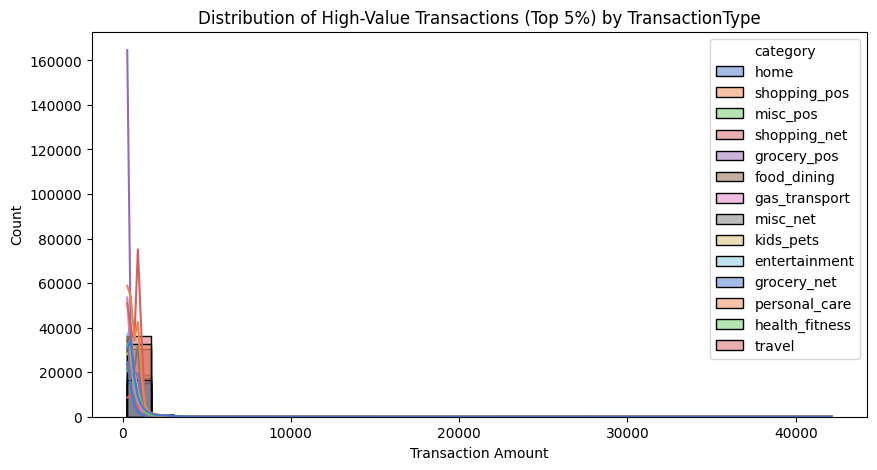

In [28]:
high_value_threshold = df['amt'].quantile(0.97)
high_value_transactions = df[df['amt'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
# Adding TransactionType as hue for high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='amt', bins=30, kde=True, hue='category', palette='muted')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.show()

In [29]:
df['unix_time'].value_counts().sort_values(ascending=False).head(5)

,count
unix_time,
1670616664,9
1672434051,8
1670696133,8
1658643519,8
1670771433,8


In [30]:
df[df['unix_time'] == 1670616664]

,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age
405839,F,Allentown,PA,40.6018,-75.5225,166081,"Nurse, learning disability",f9d506c157c8e7aea7b49bc644d3e91d,2022-12-09,21:11:04,...,64.28,51.54,2648.84,82150.15,972843.03,1,6,12,39,34
605853,F,Cumming,GA,34.2037,-84.1031,129584,Clinical embryologist,a99712a11b811bbae4cb79222a57f86f,2022-12-09,21:11:04,...,59.00,42.55,3029.23,19075.10,107316.03,5,9,11,28,49
1289087,F,Milford,CT,41.2175,-73.0549,52759,Fish farm manager,8417f30b7ef696981ad484ba9f25601e,2022-12-09,21:11:04,...,87.42,33.16,1188.32,83603.90,588937.82,7,9,11,16,73
3368882,F,Muskego,WI,42.9047,-88.1214,24850,Trade union research officer,1bdf4010875fbdddbfe4681237c1e6cf,2022-12-09,21:11:04,...,30.01,58.77,548.12,75340.07,1025961.56,0,10,11,36,60
4236973,M,Saratoga,CA,37.2713,-122.0227,30617,Actor,22b178eeb73ca27e59d5a73b9ae2df82,2022-12-09,21:11:04,...,83.45,24.51,3127.88,22830.92,1026673.17,3,9,23,42,43
6661070,M,Philadelphia,PA,39.9597,-75.2024,1526206,Research scientist (life sciences),2789ed0237988723625393cfcc33ccf4,2022-12-09,21:11:04,...,72.67,69.32,1390.72,41533.83,647823.15,4,13,21,25,46
6968329,F,Fort Worth,TX,32.7392,-97.3852,813980,Architect,d349e659acb07c59c2f208e525c2dfbb,2022-12-09,21:11:04,...,2.14,43.40,3197.63,2085.07,799637.48,4,8,16,22,48
7647282,F,San Francisco,CA,37.7509,-122.4153,805301,Emergency planning/management officer,b396a1b776307b33de3b1dc62e1323a9,2022-12-09,21:11:04,...,66.44,69.55,3236.07,83420.61,221722.53,4,15,15,40,42
8217978,F,Olalla,WA,47.4241,-122.5745,4887,Mental health nurse,1b49051328a7f7109915e37ea7cb1e95,2022-12-09,21:11:04,...,79.09,50.36,3940.14,21845.99,74112.51,6,14,14,33,40


<Axes: xlabel='age'>

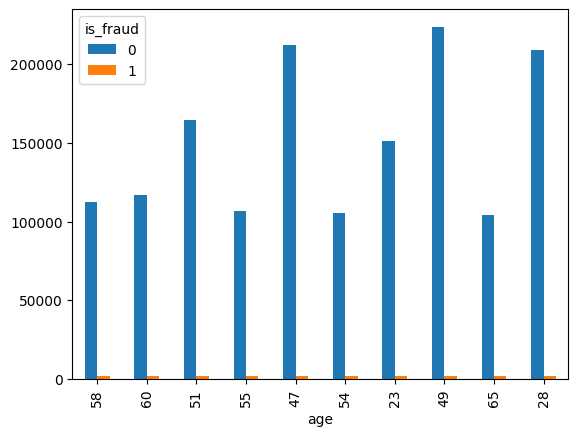

In [31]:
df.groupby('age')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar')

<ipython-input-32-58f49b53e1b6>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud_counts = df.groupby('age_group')['is_fraud'].value_counts().unstack().fillna(0)


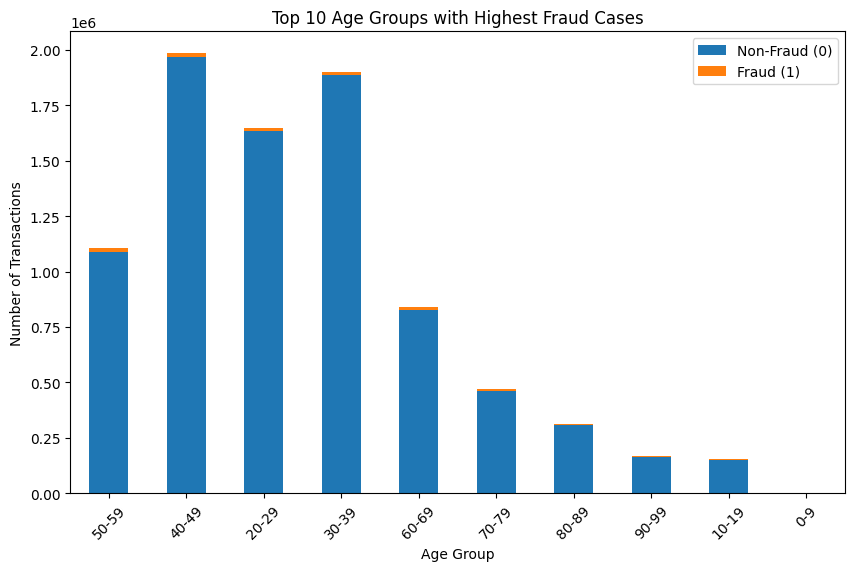

In [32]:
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10), labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Group by age group and count fraud occurrences
age_fraud_counts = df.groupby('age_group')['is_fraud'].value_counts().unstack().fillna(0)

# Sort by fraud occurrences (1) in descending order and plot the top 10
age_fraud_counts.sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(10, 6))

# Plot enhancements
plt.title('Top 10 Age Groups with Highest Fraud Cases')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.legend(['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)
plt.show()

In [33]:
df[df['age']>70].value_counts()

gender  city         state  lat      long       city_pop  job                                  trans_num                         trans_date  trans_time  unix_time   category       amt     is_fraud  merchant                              customer_num_trans_1_day  customer_num_trans_7_day  customer_num_trans_30_day  trans_time_is_night  trans_time_day  trans_date_is_weekend  customer_avg_amout_1_day  customer_avg_amount_7_day  customer_avg_amount_30_day  merchant_num_trans_1_day  merchant_num_trans_7_day  merchant_num_trans_30_day  merchant_risk_1_day  merchant_risk_7_day  merchant_risk_30_day  merchant_risk_90_day  age  age_group
F       Aberdeen     MD     39.5109  -76.1805   21487     Buyer, industrial                    00c9949f8354a3453112288da3a33eff  2022-10-07  08:19:50    1665127190  shopping_pos   46.73   0         fraud_Beier-Hyatt                     1                         2                         7                          0                    4               0                      80.62                     89.78                      23.55                       1933.55                   93725.30                  194115.18                  7                    7                    9                     12                    90   80-89        1
M       Duluth       MN     46.7408  -92.1698   116688    Biomedical scientist                 949a102fa01de7ed62e9e76095d892c9  2022-07-29  06:49:11    1659073751  misc_net       6.59    0         fraud_Rodriguez, Yost and Jenkins     6                         11                        20                         1                    4               0                      28.37                     73.90                      10.13                       845.78                    66235.11                  993281.59                  0                    1                    2                     20                    80   70-79        1
                                                                                               953a8a55f13627f98ca949b7a38831c9  2023-03-24  19:51:19    1679683879  personal_care  41.77   0         fraud_Schoen, Nienow and Bauch        1                         6                         15                         1                    4               0                      82.90                     89.61                      23.84                       2400.65                   67941.90                  895879.81                  7                    12                   20                    37                    80   70-79        1
                                                                                               954ec8f9b43203c1db0083a2ad37c982  2022-05-28  10:50:17    1653731417  gas_transport  15.24   0         fraud_Kutch LLC                       5                         9                         15                         1                    5               1                      63.98                     10.96                      27.79                       486.23                    48473.73                  763880.49                  3                    15                   22                    35                    80   70-79        1
                                                                                               9579cc162569dfd4bc5630baf880b839  2023-03-06  20:58:43    1678132723  kids_pets      43.23   0         fraud_Schaefer Ltd                    3                         6                         16                         0                    0               0                      76.54                     23.57                      8.44                        3190.36                   13516.63                  22231.48                   1                    5                    11                    11                    80   70-79        1
                                                                                                                                                               

### KMeans Clustering

customer activity patterns and spending behaviour

In [34]:
# feat = ['customer_num_trans_1_day',
#        'customer_num_trans_7_day', 'customer_num_trans_30_day',
#        'customer_avg_amout_1_day', 'customer_avg_amount_7_day',
#        'customer_avg_amount_30_day', 'merchant_num_trans_1_day']

feat = ['lat', 'long']

In [35]:
# Take a 10% sample of the dataset for analysis
df_sample = df.sample(frac=0.1, random_state=42)  # 10% of 8.5M rows = 850,000 rows


In [36]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample[feat])


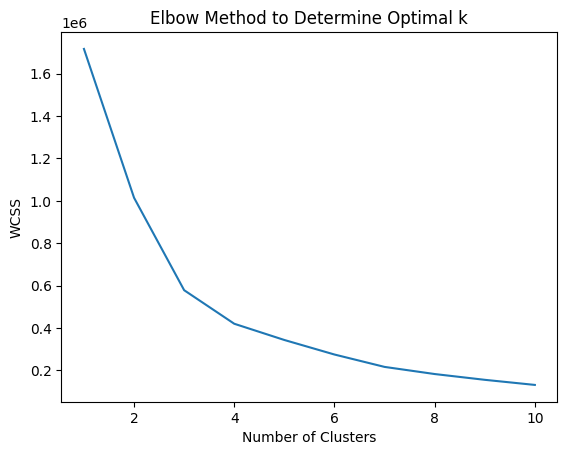

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [38]:
optimal_k = 2  # Example value, adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(df_scaled)

In [39]:
# Fit K-means with the chosen number of clusters (k=2)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_scaled)

# Assign clusters and calculate distance to cluster centroid
df_sample['Cluster'] = kmeans.labels_
df_sample['DistanceToCentroid'] = np.linalg.norm(df_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df_sample['DistanceToCentroid'].quantile(0.95)
potential_frauds = df_sample[df_sample['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 42883


,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age,age_group,cluster,Cluster,DistanceToCentroid
3826956,F,Bellevue,WA,47.6150,-122.1663,131324,Geophysicist/field seismologist,f23d58bf0ff84644da959aa68f33e872,2022-12-24,20:07:40,...,1000657.90,2,15,17,46,67,60-69,1,1,1.927475
4620363,M,Pompano Beach,FL,26.2997,-80.1810,425636,Sports coach,97490f38bfbb8bcdeed081a385f9e0f0,2022-05-08,02:41:18,...,572341.78,4,11,14,21,55,50-59,0,0,2.128022
2985166,M,West Palm Beach,FL,26.6644,-80.1741,459921,Hydrologist,30d7dcc4b8b961a01f179e2900817c8b,2022-12-16,17:12:01,...,653958.87,0,12,12,20,36,30-39,0,0,2.058856
3205378,M,Wasilla,AK,61.5923,-149.3959,52168,Health and safety inspector,583fb02ec81bc030e3fe058b24683275,2023-03-03,23:05:15,...,30262.12,6,6,14,17,25,20-29,1,1,4.957078
3638396,F,Colbert,WA,47.8411,-117.3759,8574,"Horticulturist, commercial",0490298b6511729713ef5043d9195741,2022-12-31,16:40:37,...,1030699.45,6,6,7,36,39,30-39,1,1,1.952286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624998,F,West Palm Beach,FL,26.6627,-80.2530,459921,"Psychotherapist, dance movement",42fe908d0be0bf328ef31e4997cc19e5,2022-12-04,21:05:34,...,70770.34,5,7,12,21,49,40-49,0,0,2.058659
7948916,F,Aiea,HI,21.3908,-157.9332,40281,"Engineer, water",b38c585ec85ddee21f3cf7dc30a802ab,2022-06-10,01:44:03,...,665155.68,7,8,17,35,34,30-39,0,1,3.928087
7468565,F,Miami,FL,25.6062,-80.3426,1737737,Travel agency manager,728a50ed6361b1e270eeab9e96ab8f9c,2022-11-19,01:33:53,...,602599.86,1,11,23,20,97,90-99,0,0,2.258743
1231007,M,Seattle,WA,47.6488,-122.3964,837792,"Development worker, community",e76bc84c9fa46e3bc0b13bf85af30c6e,2022-07-04,02:29:19,...,73655.08,5,6,15,35,37,30-39,1,1,1.935818


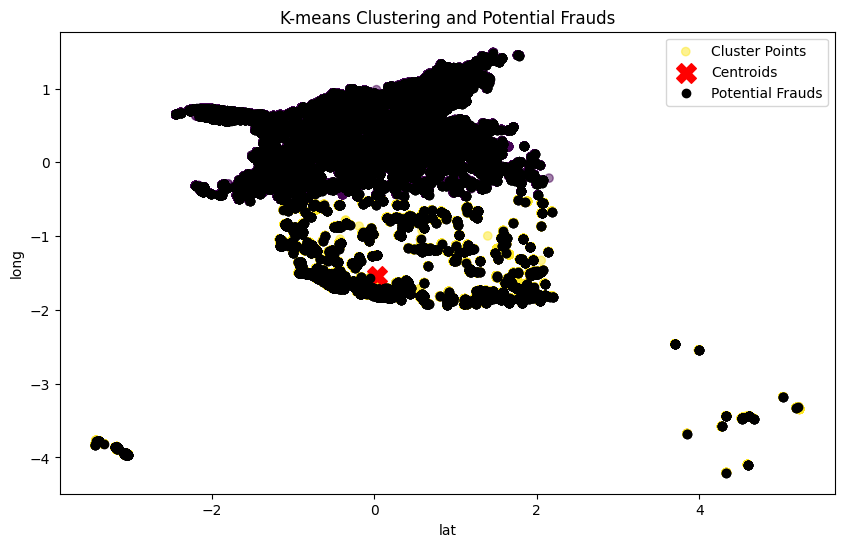

In [40]:
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
# Get the indices of potential frauds within df_sample
fraud_indices_in_df_sample = potential_frauds.index.get_indexer(potential_frauds.index)

#Filter df_scaled using fraud_indices_in_df_sample
frauds = plt.scatter(df_scaled[fraud_indices_in_df_sample, 0], df_scaled[fraud_indices_in_df_sample, 1], c='black', label='Potential Frauds', edgecolors='k')


plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.show()

In [41]:
df.head()

,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age,age_group
0,F,Rockford,IL,42.2786,-89.0361,189162,"Accountant, chartered management",1a91d07261b8e16242126081f37087f2,2023-01-28,13:02:02,...,6.97,4824.23,73065.81,141799.95,4,13,20,14,29,20-29
1,M,Ceres,CA,37.5833,-120.9496,42753,Medical secretary,e85e0881922637f40a3601f1d9650554,2022-07-09,04:29:11,...,8.06,3243.55,51496.77,1093950.50,3,10,11,28,67,60-69
2,F,Buffalo,NY,42.8371,-78.7484,564824,"Surveyor, insurance",bba131a81aa5fa3d38970c1e4bf95b5e,2022-07-12,11:02:17,...,43.41,4242.22,26384.49,1005859.33,6,14,23,48,35,30-39
3,M,Mansfield Center,CT,41.7698,-72.2011,4821,"Administrator, sports",7bd0d965cd408600df215604b555b9a2,2022-06-19,05:17:43,...,52.05,4303.16,3476.36,226662.34,3,11,14,14,64,60-69
4,F,Anaheim,CA,33.8186,-117.9729,354475,"Engineer, water",f160dd77d3916b44d5c7a8840670e0cc,2022-05-31,02:03:53,...,24.65,2424.13,32215.14,36989.60,2,13,16,20,47,40-49
